In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley import ShapNN
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [70]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [71]:
data = pd.read_csv('data.csv')
data.head()
Y = data['diagnosis'].to_numpy()
X = data.drop('id', axis = 1)
X = X.drop('diagnosis', axis = 1)
X = X.to_numpy()

X_raw = X
y_raw = Y
X, y = X_raw[:train_size], y_raw[:train_size]
X_test,y_test = X_raw[train_size:], y_raw[train_size:]
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1]


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [72]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False)

Starting LOO score calculations!
LOO values calculated!
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iter

In [73]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

LOO values calculated!
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations


In [74]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=2)
dshap.run(100, 0.1)

LOO values calculated!
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations


Now we merge results for the parallel runs:

In [77]:
dshap.merge_results()

./temp\mem_tmc_0000.pkl
./temp\mem_g_0000.pkl


Let's look at the convergence plots of the algorithms.

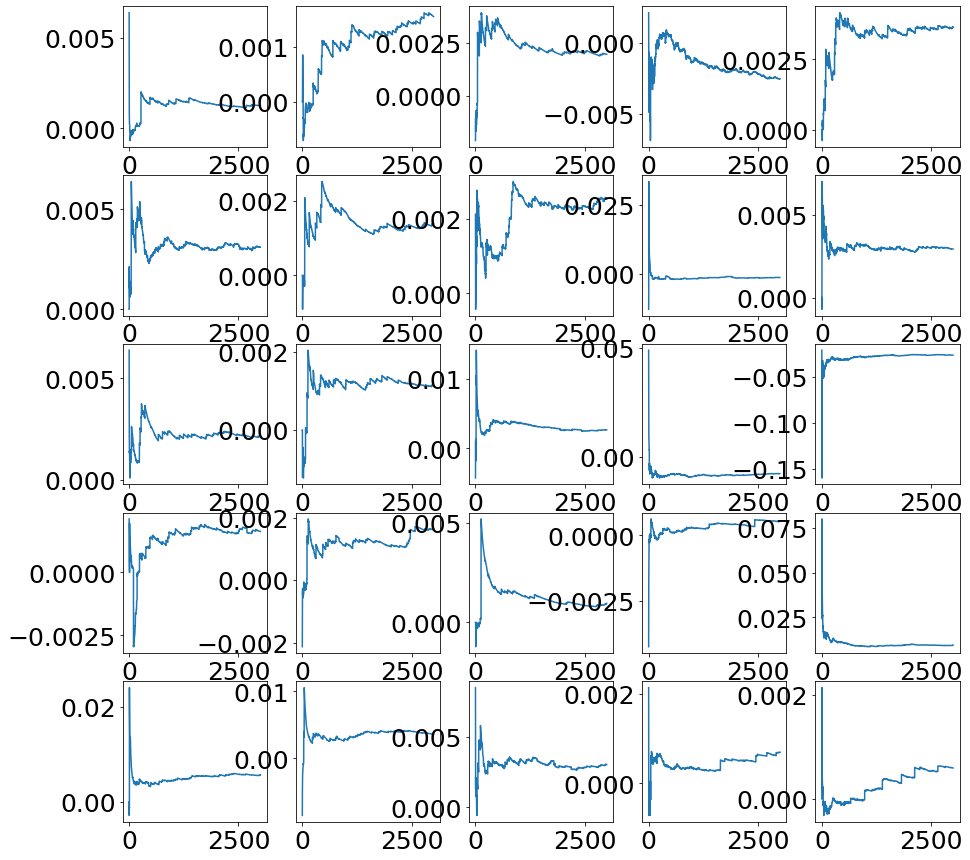

In [78]:
convergence_plots(dshap.marginals_tmc)

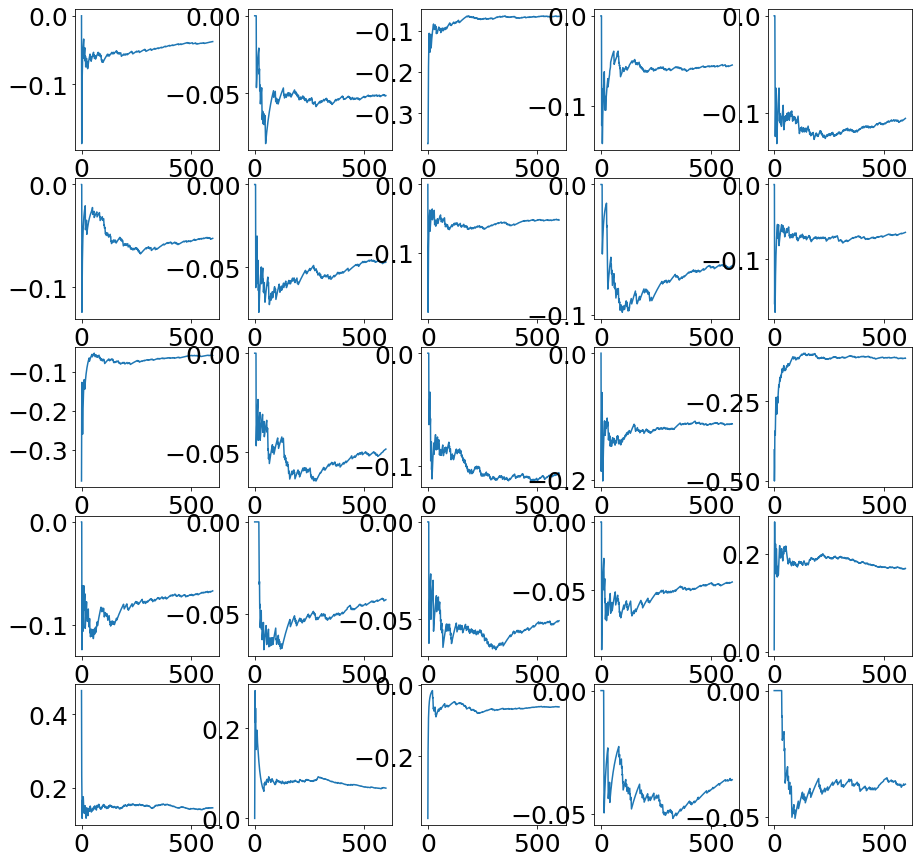

In [79]:
convergence_plots(dshap.marginals_g)

Now let's see the effect of removing high valuen points

In [82]:
print(dshap.values_tmc)

[ 0.00125871  0.00155295  0.00197157 -0.00253873  0.00365529  0.00311443
  0.00139588  0.00257001 -0.00128287  0.00292964  0.00217058  0.00112154
  0.00263682 -0.00766311 -0.02667875  0.00163539  0.00165316  0.00095238
  0.00053234  0.00955011  0.00566596  0.00361123  0.00304762  0.00069723
  0.00059133  0.0019204   0.00127434  0.00367733  0.00114712  0.00312864
  0.00089979  0.00169581  0.00170931  0.00113859  0.00252452  0.00273774
 -0.00886709  0.00264606  0.00208884 -0.00590263  0.00050178 -0.00568799
  0.00141933  0.00141009 -0.00142289  0.00194883  0.00336745 -0.00065387
  0.00829069  0.02533973  0.00663753  0.00769225  0.00630775  0.00371286
  0.00204193  0.00637242  0.00066951  0.00170007  0.00639872  0.00325586
  0.00294101  0.00458209  0.0023248   0.00421962  0.00128074  0.00163113
  0.00435252  0.00647832  0.00366453  0.00428785  0.00079176  0.00190547
  0.00083795 -0.00112367  0.00943852  0.00204833  0.0020064   0.00224307
  0.00330561  0.00848259  0.0084435   0.00482942  0

In [100]:
print(dshap.X_test)

[[1.361e+01 2.498e+01 8.805e+01 ... 2.651e-01 7.397e-02 1.000e+00]
 [6.981e+00 1.343e+01 4.379e+01 ... 2.932e-01 9.382e-02 0.000e+00]
 [1.218e+01 2.052e+01 7.722e+01 ... 2.694e-01 6.878e-02 0.000e+00]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 2.218e-01 7.820e-02 1.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 1.000e+00]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.871e-01 7.039e-02 0.000e+00]]
